In [160]:
import openpyxl
import numpy as np
from sklearn import preprocessing

## Abrir Excel con Datos
file_train = 'CREDITRISK_RAW.xlsx'
wb = openpyxl.load_workbook(file_train)
sheet = wb.get_sheet_by_name('Sheet1')
sheet = wb.active

# Forma matriz para contener datos
columns = 20
rows = 2294
data_matrix = np.zeros(shape=(rows, columns))

# Columnas con datos no numericos, se deben pasar a labels numericos usando un LabelEncoder
non_numerical_columns = [1, 4, 5, 8, 18, 19]  ##
non_numerical_info = []
clases = []
clases_num_encode = []
features_names = []
empty_cell = sheet.cell(row=85, column=8).value  ## Ejemplo de celda vacia

for i in range(columns):
    j = 0
    column_i = []
    
    flag_non_numeric = False
    flag_append = True
    
    # Verificar si la columna es de datos no numericos
    if i in non_numerical_columns:
        flag_non_numeric = True
            
    for cellObj in sheet.columns[i]:
        if j > 0:
            if (cellObj.value == empty_cell) and (not flag_non_numeric):
            #if (cellObj.value == empty_cell):
                #flag_append = False
                column_i.append(0)
            else:
                column_i.append(cellObj.value)
        
        else:
            name = cellObj.value
            if i>0:
                features_names.append(name)
            print name
            
            
        j += 1
    
    
    if flag_non_numeric:
        le = preprocessing.LabelEncoder()
        le.fit(column_i)
        clases.append(list(le.classes_))  
        non_numerical_info.append(sheet.cell(row=1, column=i+1).value)
        
        # Encode de datos
        column_i = le.transform(column_i)
      
    if flag_append:
        data_matrix[:,i] = column_i
    else:
        print name + " no added"

   

GENERO
RENTA
EDAD
NIV_EDUC
E_CIVIL
COD_OFI
COD_COM
CIUDAD
Crédito_1
Crédito_2
Crédito_3
Crédito_4
Monto solicitado
Días de Mora
Monto Deuda Promedio
Número de meses inactivo
numero de cuotas
Aval
PAGA


In [123]:
## Calculo de caracteristicas



[ 1.  1.  2.  2.  1.  3.  1.  1.  1.  1.]


In [161]:
# Eliminar NaN values
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data_matrix)

data_matrix = imp.transform(data_matrix)

Feature ranking:
1. EDAD: 0.160861334388
2. GENERO: 0.10578191966
3. NIV_EDUC: 0.104494906601
4. COD_COM: 0.100668214054
5. COD_OFI: 0.0996202347017
6. Crédito_4: 0.0605590843648
7. Número de meses inactivo: 0.0561374296644
8. RENTA: 0.0543864405807
9. CIUDAD: 0.0437600232072
10. numero de cuotas: 0.0393290667466
11. Monto solicitado: 0.0387649799297
12. Crédito_2: 0.0344274156434
13. Monto Deuda Promedio: 0.0323719650356
14. E_CIVIL: 0.0320812805394
15. Días de Mora: 0.0140215743332
16. Crédito_1: 0.0127811692376
17. Aval: 0.00625667781994
18. Crédito_3: 0.00369628349276


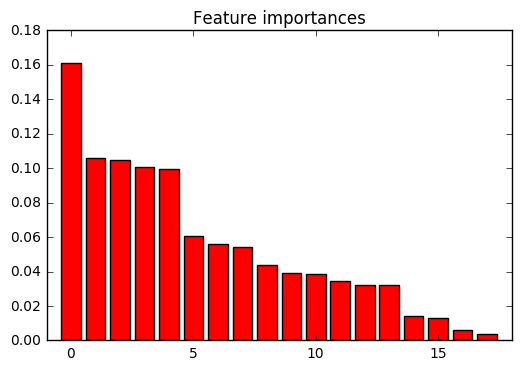

NameError: name 'time' is not defined

In [171]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

N_features = (columns - 1) # Se resta ID y Label, PAGA o NO PAGA
X = data_matrix[:,1:N_features]
Y = data_matrix[:,columns - 1]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.25, random_state = True)

clf = RandomForestClassifier(n_estimators=650, max_depth=None, bootstrap = True, n_jobs = -1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict_proba(X_test)


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print str(f+1)+". "+ features_names[indices[f]] + ": "+str(importances[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", align="center")
#plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()


In [174]:
from time import time
from sklearn import metrics
t0 = time()
pred = clf.predict(X_test)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)

score = metrics.accuracy_score(Y_test, pred)
print score

test time:  0.835s
0.932597327135
